In [1]:
# Importar librerías necesarias
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Ruta del dataset
ruta_dataset = "../../Limpieza/data/df_unificado_limpio_imputado.csv"
df = pd.read_csv(ruta_dataset)

In [4]:
# Separar variables predictoras y objetivo
columnas_predictoras = ['AÑO', 'TRIMESTRE', 'VELOCIDAD BAJADA', 'VELOCIDAD SUBIDA', 'Latitud', 'Longitud']
X = df[columnas_predictoras]
y = df['No. ACCESOS FIJOS A INTERNET']

In [5]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Crear y entrenar el modelo LightGBM
modelo_lgb = lgb.LGBMRegressor(
    objective='regression',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
modelo_lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 734308, number of used features: 6
[LightGBM] [Info] Start training from score 44.371779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

LGBMRegressor(max_depth=6, objective='regression', random_state=42)

In [7]:
# Hacer predicciones
y_pred = modelo_lgb.predict(X_test)

In [8]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 303885.37045676564
Coeficiente de determinación (R²): 0.21737009588170753


In [10]:
# Importancia de las variables
importancia = modelo_lgb.feature_importances_
variables = columnas_predictoras

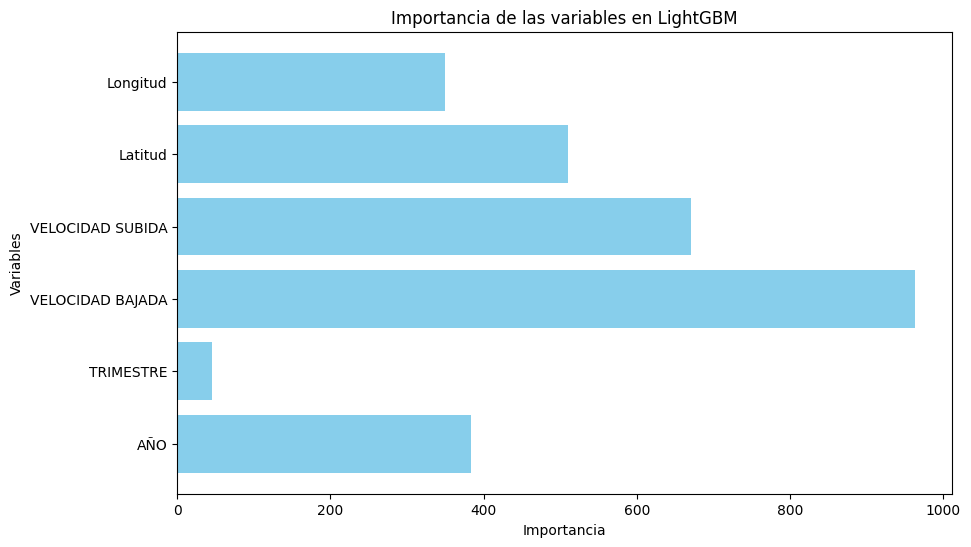

In [11]:
# Gráfico de importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(variables, importancia, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en LightGBM')
plt.show()

# Conclusiones del Modelo LightGBM

## 1. Desempeño del modelo
- **Error Cuadrático Medio (MSE):** 303,885.37  
  El MSE indica que, en promedio, las predicciones del modelo tienen un error significativo. Aunque es mejor que algunos modelos anteriores, todavía presenta limitaciones en su capacidad de predicción.
- **Coeficiente de Determinación (R²):** 0.217  
  El valor de R² sugiere que el modelo **LightGBM** explica aproximadamente el **21.7%** de la variabilidad en los datos de acceso fijo a internet. Esto indica un desempeño modesto.

## 2. Importancia de las variables
El análisis de importancia de variables revela lo siguiente:
- **VELOCIDAD BAJADA:** Es la variable con mayor influencia en el modelo, lo que sugiere que la velocidad de descarga es un factor relevante para los accesos fijos a internet.
- **VELOCIDAD SUBIDA:** También presenta una alta importancia, indicando que las velocidades de subida juegan un rol clave en las predicciones.
- **Latitud y Longitud:** La ubicación geográfica tiene una contribución moderada al modelo, aunque no tan significativa como las velocidades.
- **AÑO:** Si bien sigue siendo importante, su relevancia se reduce en comparación con modelos anteriores.
- **TRIMESTRE:** Tiene una importancia mínima, lo que sugiere que la segmentación por trimestre no añade valor considerable al modelo.

## 3. Observaciones
- El modelo **LightGBM** muestra un desempeño similar al de **Random Forest** y **XGBoost** con los datos base, lo cual resalta que el dataset original tiene limitaciones para explicar la variabilidad.
- A diferencia de modelos previos donde **AÑO** dominaba la importancia, LightGBM asigna mayor relevancia a las variables **VELOCIDAD BAJADA** y **VELOCIDAD SUBIDA**, lo que sugiere una relación más directa entre la velocidad de conexión y el número de accesos fijos a internet.

## 4. Limitaciones
- **Bajo R²:** La baja capacidad explicativa del modelo puede deberse a la falta de variables más representativas o a patrones complejos no capturados por las características actuales.
- **Distribución de las variables:** La variabilidad en **Latitud, Longitud y Velocidades** podría ser insuficiente o no estar bien representada en el dataset.

## 5. Próximos pasos
- Realizar **ingeniería de características** adicional para incluir variables derivadas o combinar características existentes.
- Probar el modelo con los datos mejorados (nuevas características) para evaluar si el desempeño mejora.
- Ajustar hiperparámetros del modelo LightGBM utilizando **GridSearchCV** o **RandomizedSearchCV** para optimizar el rendimiento.
- Comparar con otros algoritmos como **CatBoost** o redes neuronales.

